<a href="https://colab.research.google.com/github/PrathamKumar125/Computer-Vision/blob/master/CV4(b)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.(b) write a program for Image Features and Alignment**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Scanned Form')

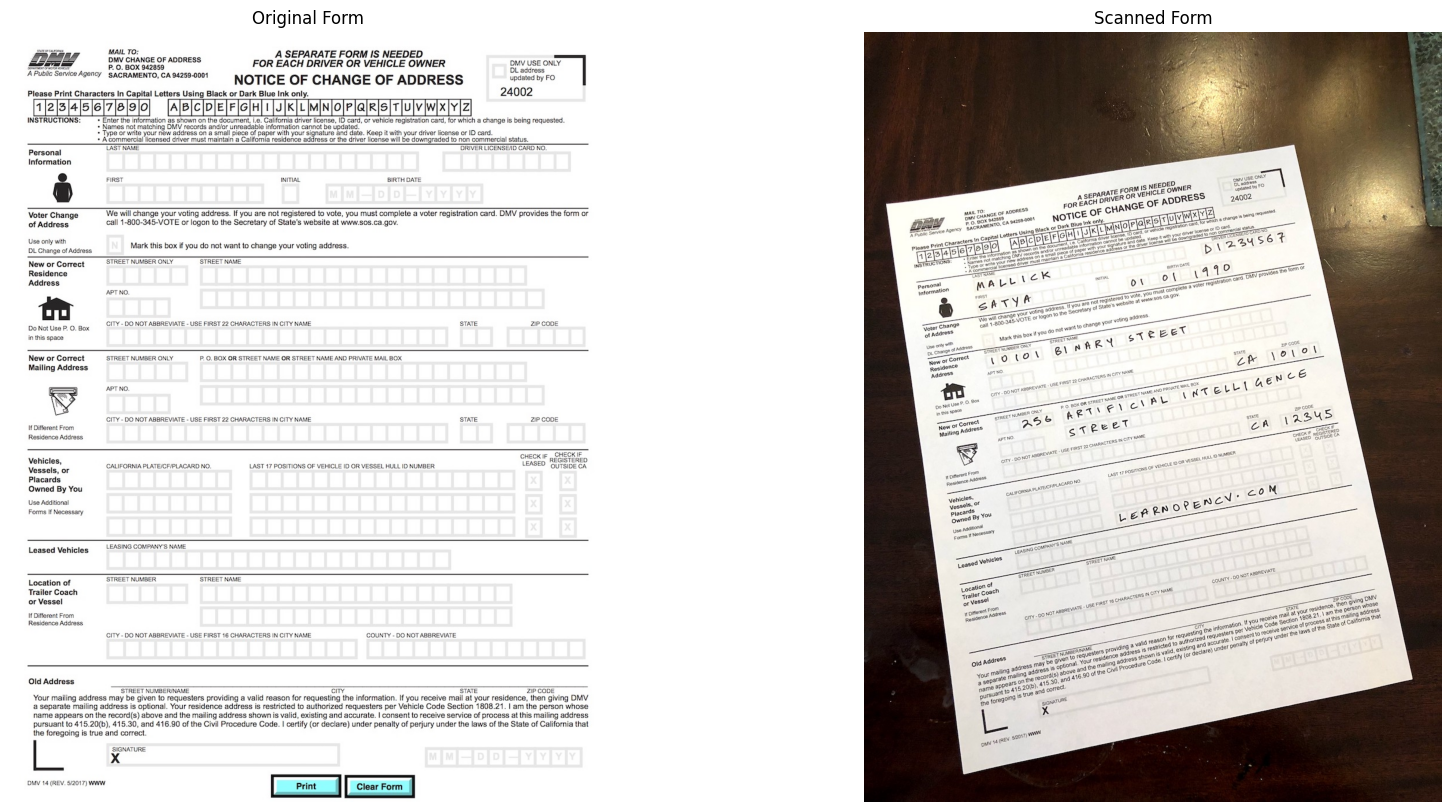

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Read reference image
im1 = cv2.imread('/content/drive/MyDrive/CV_Datasets/form.jpg', cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
# Read image to be aligned
im2 = cv2.imread('/content/drive/MyDrive/CV_Datasets/scanned-form.jpg', cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
# Display Images
plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

In [ ]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [ ]:
# Detect ORB features and compute descriptors. # Rotation & Scale change
# SIFT, SURF
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES) # oriented BRIEF keypoint detector and descriptor extractor.
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

In [ ]:
# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

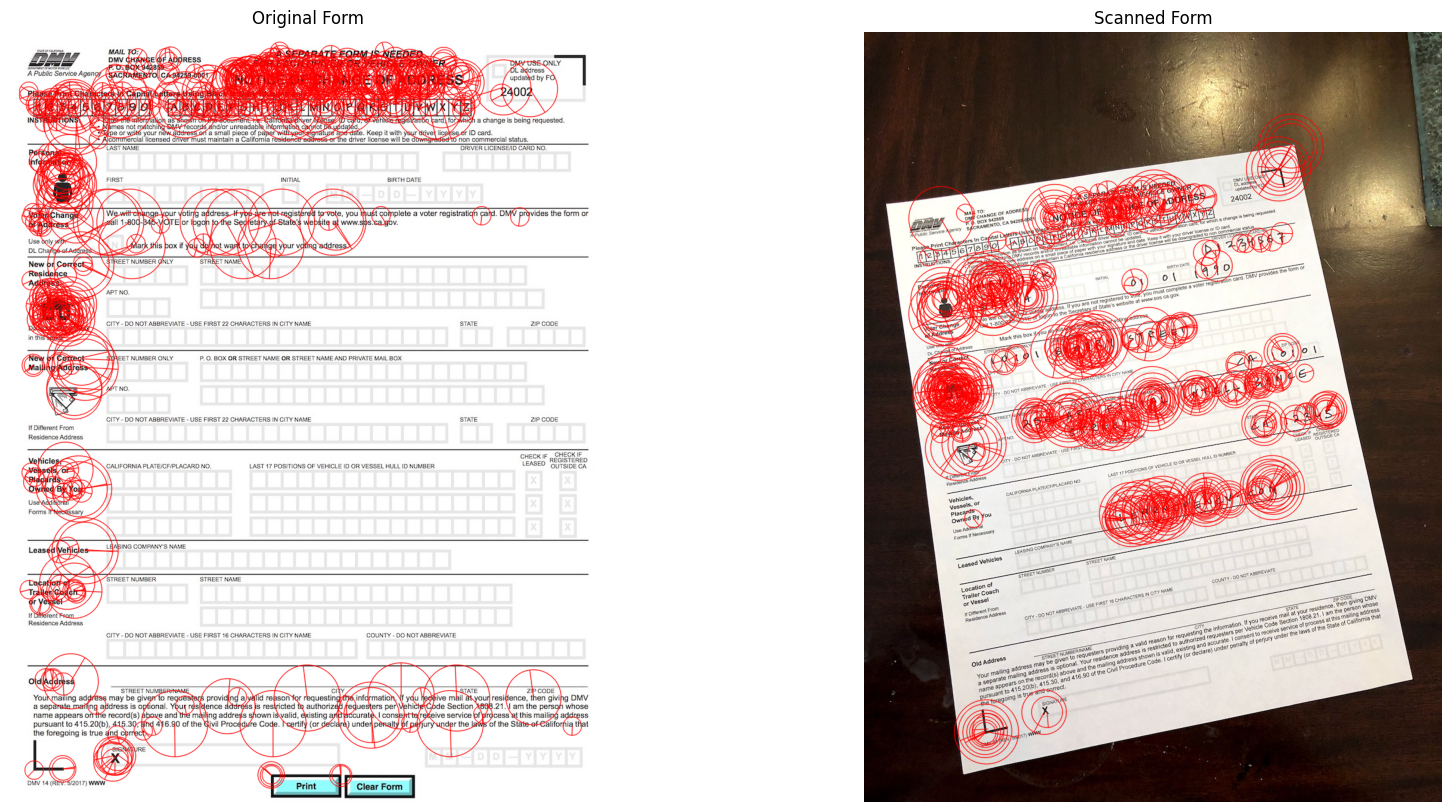

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

In [ ]:
# Match keypoints in the two image
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)
# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

Text(0.5, 1.0, 'Original Form')

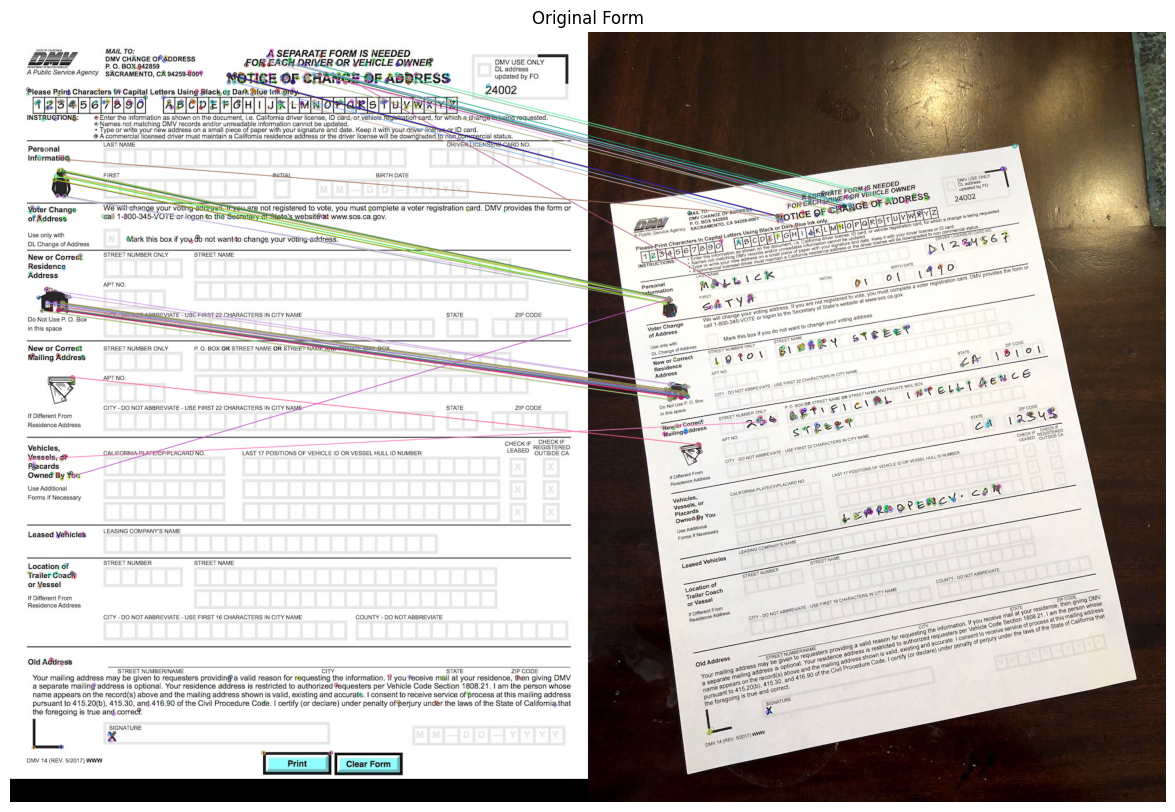

In [ ]:
plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")